In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 18)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import time

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [5]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [8]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


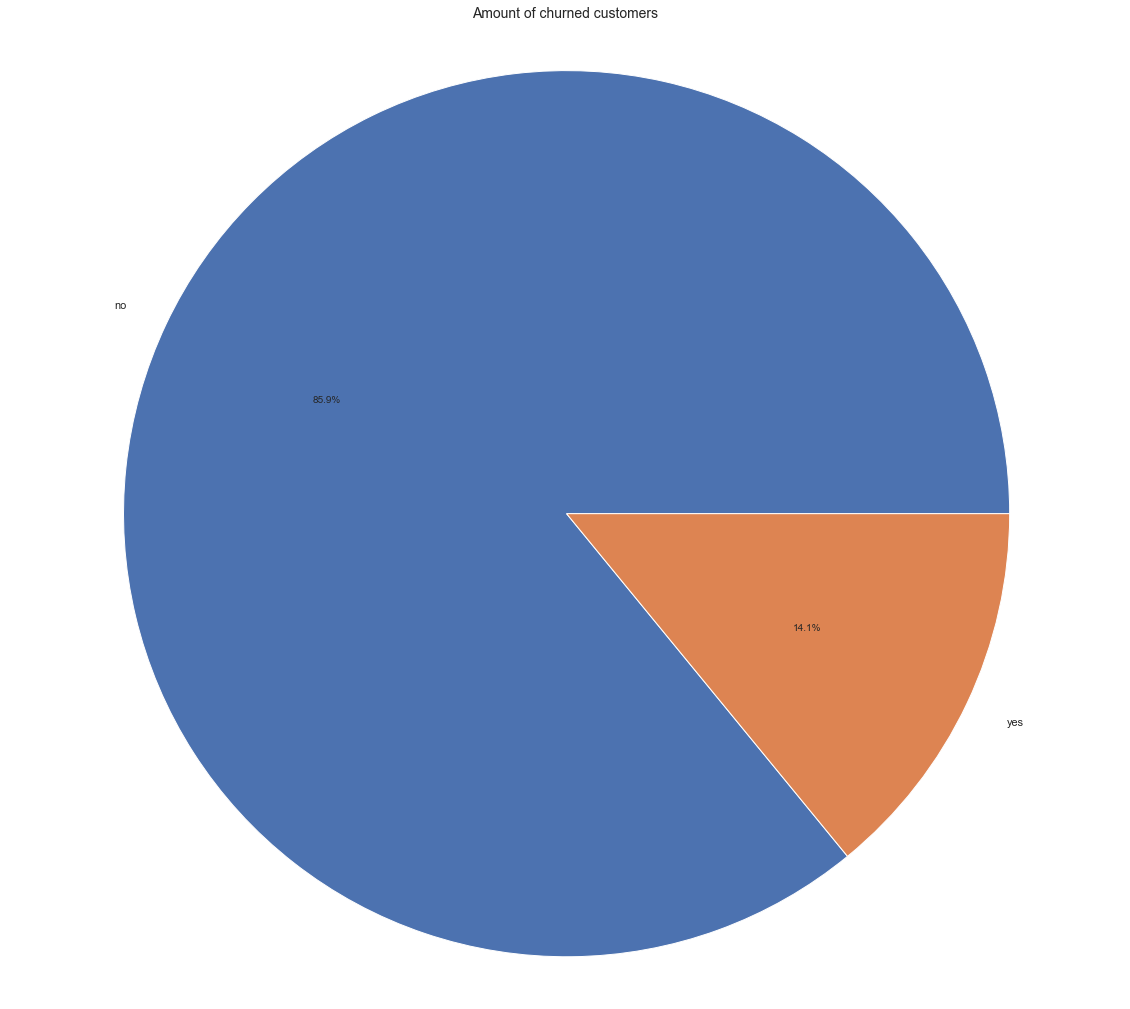

In [9]:
target = train["churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

## Select Atribute

<AxesSubplot:>

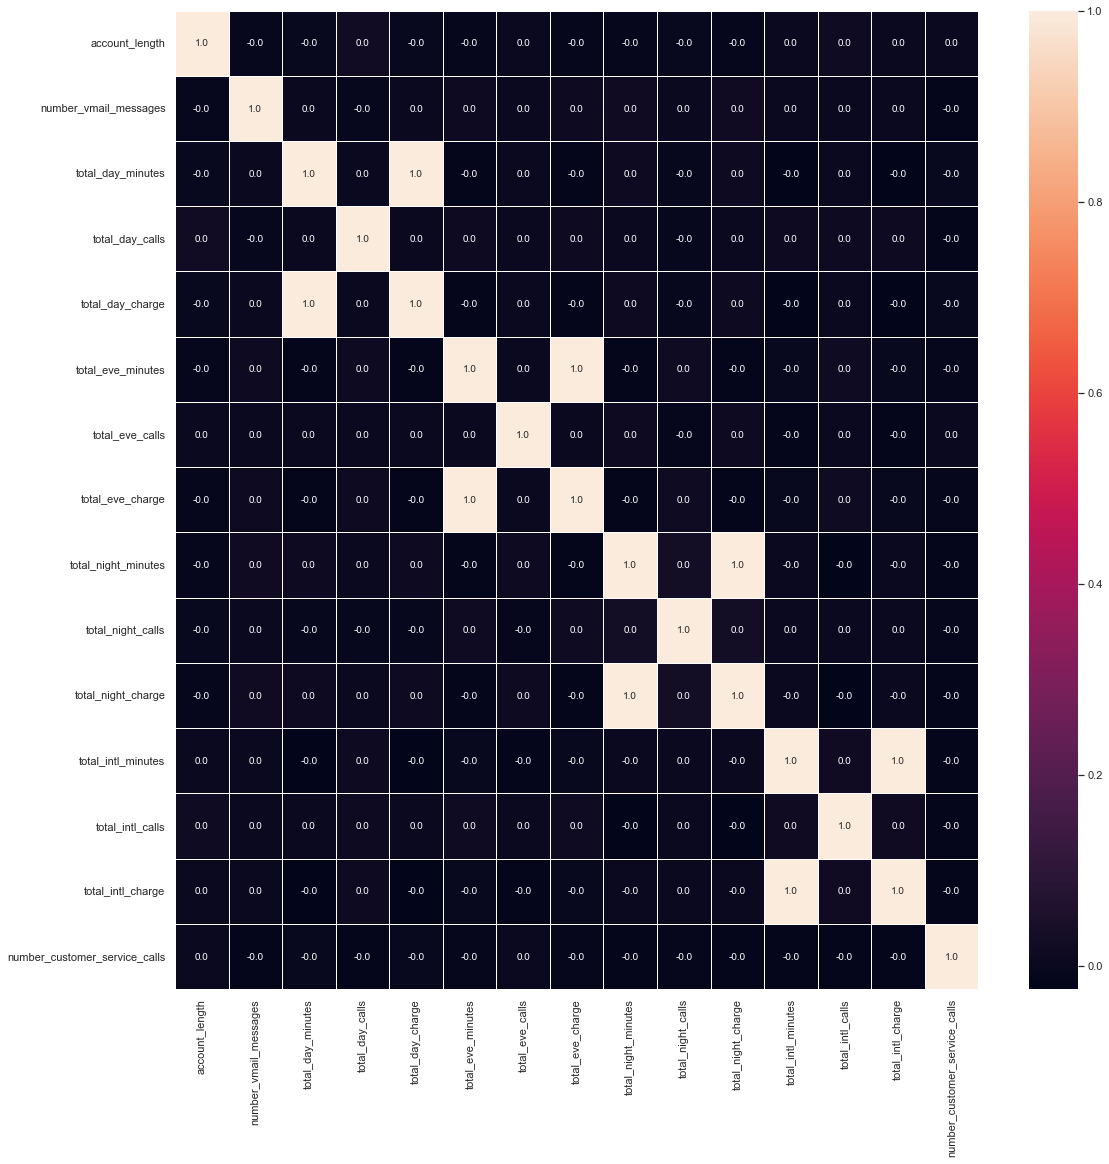

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Correlation Atribute** \
total_day_minutes - total_day_charge \
total_eve_charge - total_eve_minutes \
total_night_charge - total_night_minutes \
total_intl_charge - total_intl_minutes

In [11]:
drop_list1 = ['total_day_minutes','total_eve_minutes','total_night_minutes', 'total_intl_minutes']
x_train = train.drop(drop_list1,axis = 1 ) 
x_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,no


In [12]:
x_test = train.drop(drop_list1,axis = 1)

<AxesSubplot:>

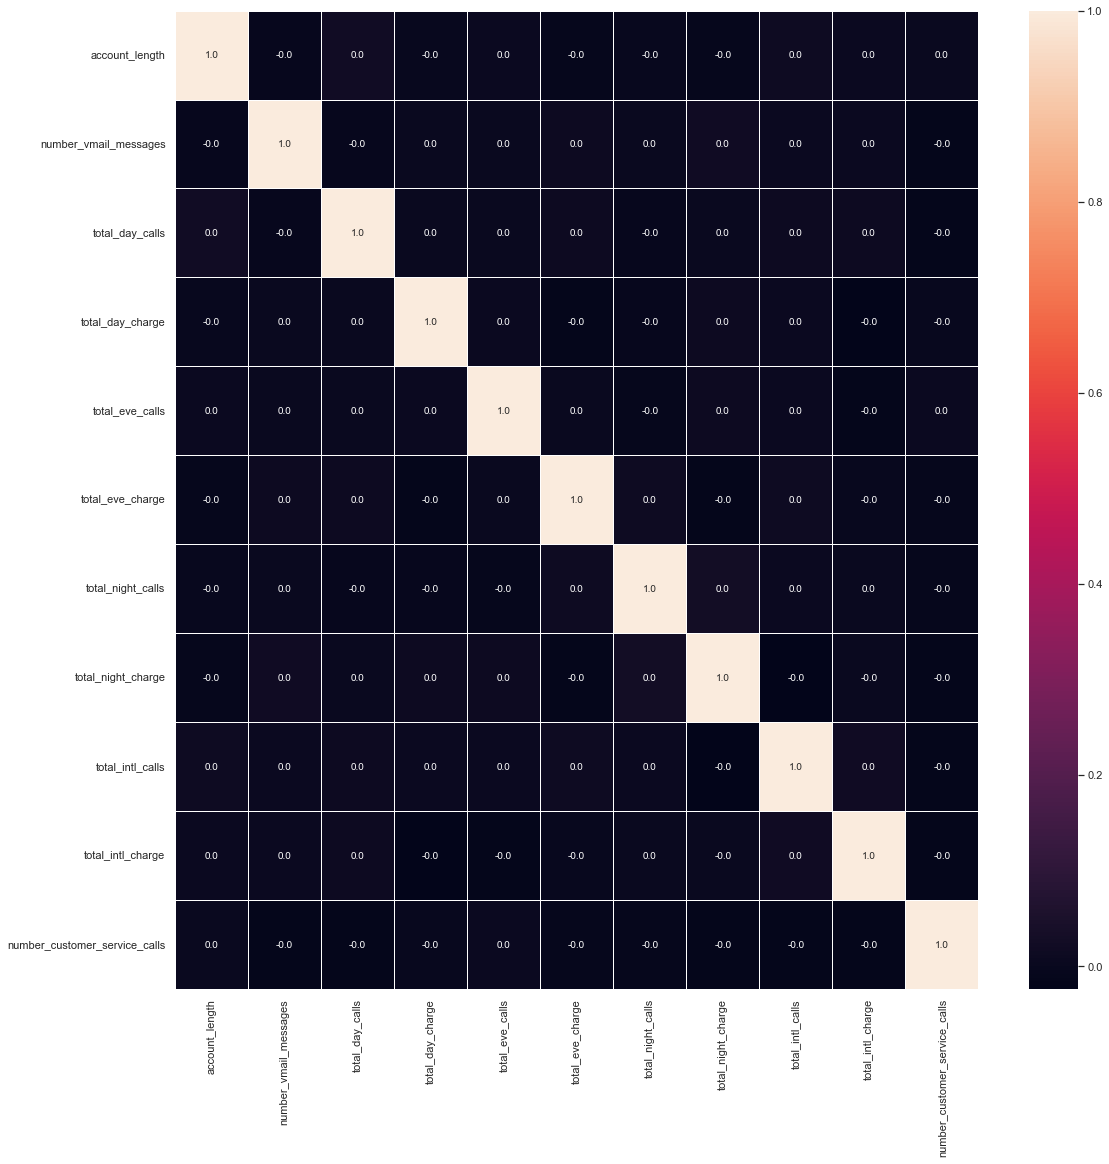

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Preprocessing

In [14]:
y_train = x_train.churn
y_train = y_train.replace("yes", 1)
y_train = y_train.replace("no", 0)

In [15]:
y_test = x_test.churn
y_test = y_test.replace("yes", 1)
y_test = y_test.replace("no", 0)

In [16]:
x_train = x_train.drop(["churn"], axis = 1)

In [17]:
x_test = x_test.drop(["churn"], axis = 1)

In [18]:
yes_no_atribute = ['international_plan', 'voice_mail_plan']

x_train['international_plan'] = x_train['international_plan'].replace("yes", 1)
x_train['international_plan'] = x_train['international_plan'].replace("no", 0)
x_train['voice_mail_plan'] = x_train['voice_mail_plan'].replace("yes", 1)
x_train['voice_mail_plan'] = x_train['voice_mail_plan'].replace("no", 0)

In [19]:
x_test['international_plan'] = x_test['international_plan'].replace("yes", 1)
x_test['international_plan'] = x_test['international_plan'].replace("no", 0)
x_test['voice_mail_plan'] = x_test['voice_mail_plan'].replace("yes", 1)
x_test['voice_mail_plan'] = x_test['voice_mail_plan'].replace("no", 0)

In [20]:
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(x_train_encoded)
normalized_train_data = scaler.transform(x_train_encoded)

scaler.fit(x_test_encoded)
normalized_test_data = scaler.transform(x_test_encoded)

Accuracy is:  0.8703529411764706


<AxesSubplot:>

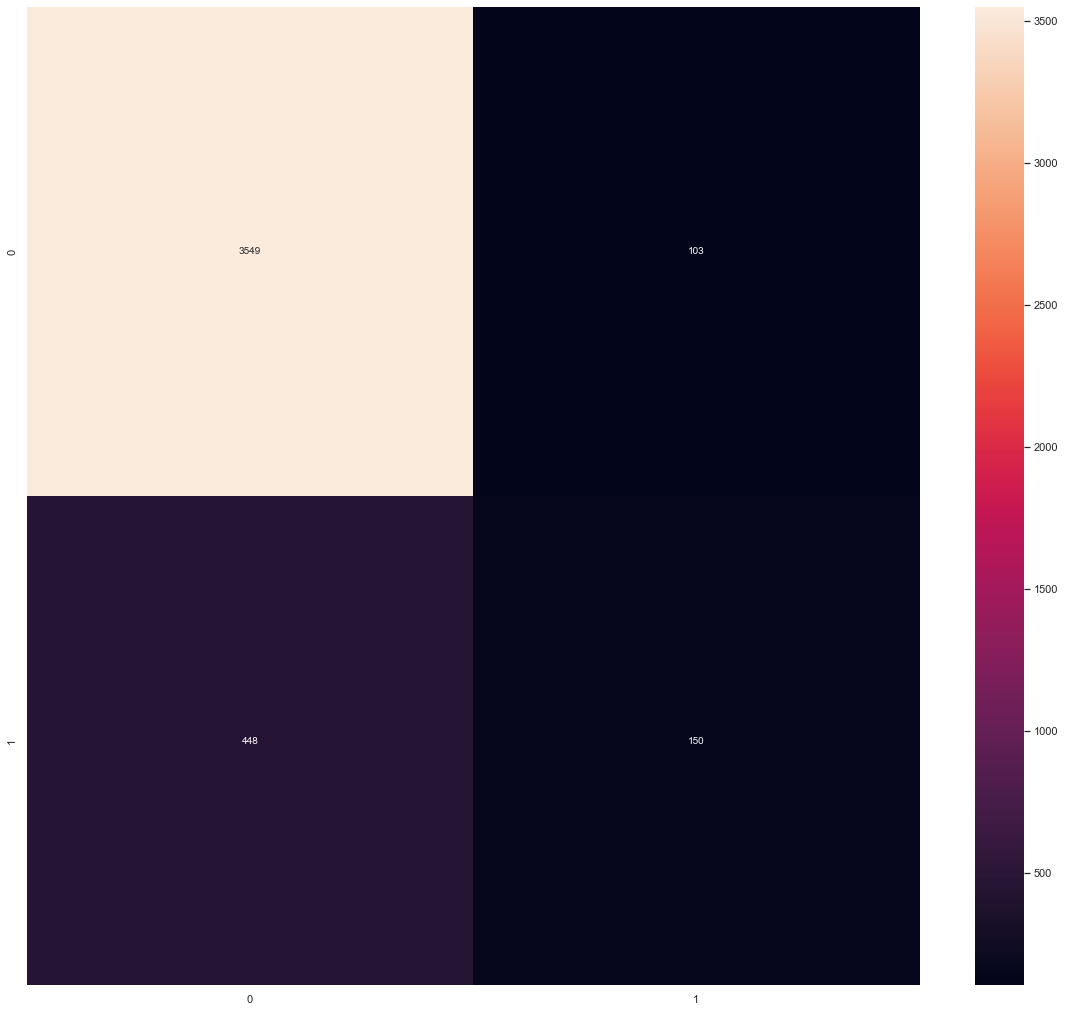

In [27]:
clf = LogisticRegression(random_state=42).fit(normalized_train_data, y_train)

ac = accuracy_score(y_test,clf.predict(normalized_test_data))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf.predict(normalized_test_data))
sns.heatmap(cm,annot=True,fmt="d")